## Scikit-Learn을 사용한 머신러닝

## 01장. 분류의 기초
### 3. Scikit-Learn의 전처리 기능

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

### 스케일링

    회귀분석에서 R모형 ""안에서 scale() 씌워서 스케일링 해주는 것과 달리 
    classification에서는 조금 다른 방법으로 스케일링 해줘야 한다.
    
    전체 자료의 분포를 평균 0, 분산 1이 되도록 만든다.
    
    스케일링 중요성 : 스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소, 최적화 과정에서의 안정성 및 수렴 속도를 향상
    
    
    스케일링 종류
    
    - scale(X): 기본 스케일. 평균과 표준편차 사용
    - robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
    - minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
    - maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [5]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


    만약 파이프라인을 이용하면 스케일링을 함수가 아닌 Scaler 클래스로 구현해야 한다. 
    scale 함수에 대응하는 클래스는 StandardScaler 클래스이다.
    
    Scaler 클래스의 사용 방법은 다음과 같다.

    1. 클래스 객체 생성
    2. fit() 메서드와 트레이닝 데이터를 사용하여 변환 계수 추정
    3. transform() 메서드를 사용하여 실제로 자료를 변환
    
    또는 fit_transform() 메서드를 사용하여 계수 추정과 자료 변환을 동시에 실행할 수도 있다.


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

### 정규화 (Normalization)

    - 개별 데이터의 크기를 모두 같게 만들기 위한 변환
    - 벡터 원소들의 상대적 크기만 중요한 경우에 사용됨

In [9]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


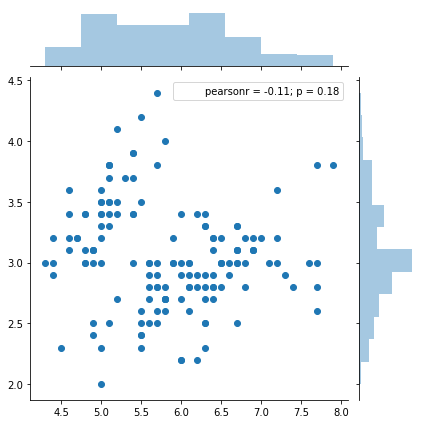

In [16]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


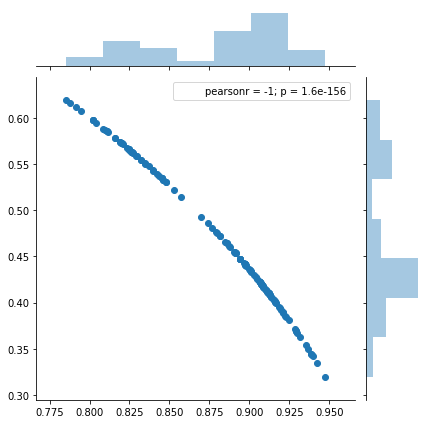

In [17]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

### 인코딩(Encoding)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [19]:
X = np.array([[0],[1],[2]])
X

array([[0],
       [1],
       [2]])

In [20]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [32]:
ohe.transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

- - -

In [24]:
X = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2]])
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [25]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [27]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [28]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [29]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

In [30]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

NameError: name 'roc_curve' is not defined

In [15]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

ImportError: cannot import name 'classification_report'

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [6]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [7]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [9]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

In [10]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.predict_proba(X)[:, 1])
fpr2, tpr2, thresholds1 = roc_curve(y, model2.predict_proba(X)[:, 1])

In [12]:
import matplotlib.pylab as plt

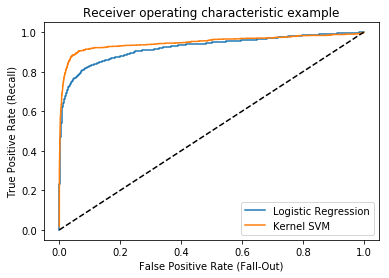

In [13]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [18]:
import statsmodels.api as sm

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [20]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# 로지스틱 회귀 logit 이용한다.

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

# pseduto R-squ : 1- G squared, 0~1 사이 값을 가지고 높을 수록 좋은 모델
# log likelihood : 구한것 중에 가장 높은 log likelihood 구함




                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        16:01:10   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [24]:
import numpy as np
import matplotlib as mpl

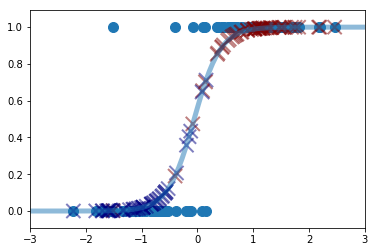

In [25]:
xx = np.linspace(-3, 3, 100)
theta = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, theta, lw=5, alpha=0.5)

plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## Scikit-Learn 패키지의 로지스틱 회귀

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

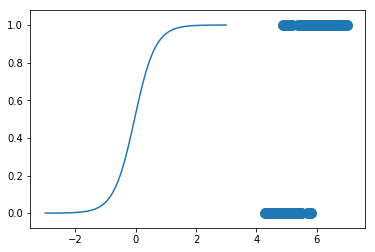

In [98]:
xx = np.linspace(-3, 3, 100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, theta)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [30]:
import pandas as pd

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

In [118]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [119]:
df["species"].unique()

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

In [120]:
df_logistic = df[(df["species"] == 'setosa') | (df["species"] == "versicolor")]

In [121]:
df_logistic.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [122]:
df_logistic["y"] = np.where(df_logistic['species']== "setosa",0,1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
X0 = df_logistic["sepal length (cm)"]

In [124]:
X = sm.add_constant(X0)

In [125]:
y = df_logistic["y"]

In [126]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        16:55:30   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal le

In [127]:
from sklearn.metrics import confusion_matrix

1. 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다.
2. 위 결과를 confusion matrix와 classification report로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [149]:
y_true = y
y_pred = logit_res.predict(X)

In [ ]:
y_pred

In [154]:
result_df = pd.DataFrame(columns=["y_true","y_pred"])

In [156]:
result_df["y_true"] = y_true
result_df["y_pred"] = y_pred

In [160]:
result_df["y_pred"] = np.where(result_df["y_pred"] <= 0.5 ,0,1)

In [161]:
result_df

,y_true,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [162]:
print(confusion_matrix(result_df['y_true'], result_df['y_pred']))

[[45  5]
 [ 6 44]]


In [165]:
target_names = ['setosa', 'versicolor']
print(classification_report(result_df['y_true'], result_df['y_pred'], target_names=target_names))

             precision    recall  f1-score   support

     setosa       0.88      0.90      0.89        50
 versicolor       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve()

In [ ]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.legend()
plt.show()

In [170]:
import konlpy

In [171]:
import nltk

In [172]:
!pip3 show nltk

Name: nltk
Version: 3.3
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.6/site-packages
Requires: six
Required-by: 


In [173]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [174]:
nltk.download("gutenberg")
nltk.download('punkt')
nltk.download('reuters')
nltk.download("stopwords")
nltk.download("webtext")
nltk.download("wordnet")

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hyelanjeong/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [175]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [176]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [177]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [178]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [179]:
from nltk.tokenize import RegexpTokenizer
t = RegexpTokenizer("[\w]+")
t.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [180]:
words = ['lives', 'dies', 'flies', 'died']
from nltk.stem import PorterStemmer
st = PorterStemmer()
[st.stem(w) for w in words]

['live', 'die', 'fli', 'die']